In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def list2dic(l): 
    dic = {} 
    for item in l: 
        if (item in dic): 
            dic[item] += 1
        else: 
            dic[item] = 1
    return dic

In [3]:
def process_totext(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(i)
    prefix="data/2020-04-"
    rec_24=[]
    rec_7=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            time_7d=time.split(" ")[0]
            rec_24.append(time_24h[:2])
            rec_7+=1
        times=list2dic(rec_24)
        print(prefix+day+["","appledata"][apple]+".csv",rec_7)
        with open('timerec.txt', 'a') as f:
            f.write(prefix+day+["","appledata"][apple]+".csv"+" : "+str(rec_7)+"\n")
            f.write(str(times))
            f.write("\n")
        

In [4]:
for i in range(1,3):
    process_totext(i,0)    
    process_totext(i,1)

data/2020-04-01.csv 635684
data/2020-04-01appledata.csv 125242
data/2020-04-02.csv 723579
data/2020-04-02appledata.csv 140064


In [5]:
def vis(day):
    if day<10:
        day="0"+str(day)
    else:
        day=str(i)
    prefix="data/2020-04-"
    rec_24=[]
    with open(prefix+day+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            rec_24.append(time_24h[:2])
        times_nor=list2dic(rec_24)
    rec_24=[]
    rec_7=0
    with open(prefix+day+"appledata"+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            time_7d=time.split(" ")[0]
            rec_24.append(time_24h[:2])
            rec_7+=1
        times_app=list2dic(rec_24)
        
    list1 = sorted(times_nor.items())
    x, y = zip(*list1)
    plt.plot(x, y,'#45a8fe')
    
    list2 = sorted(times_app.items())
    a, b = zip(*list2)
    plt.plot(a, b,'#ff0000')   
    
    plt.show()

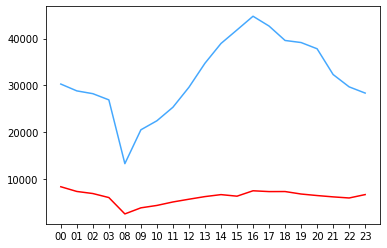

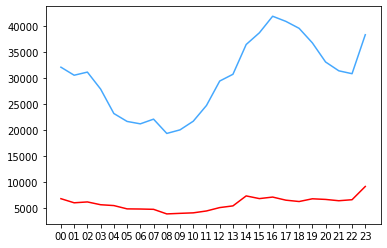

In [6]:
for i in range(1,3):
    vis(i)

In [7]:
def fol_count(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(day)
    prefix="data/2020-04-"
    fow=0
    user=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if apple==1:                
                fow+=int(row[3])
                user+=1
            else:
                if "apple" not in row[2].lower():
                    fow+=int(row[3])
                    user+=1
                else:
                    pass
        avg=fow/user
    print("Average followers number for "+prefix+day+" "+["average","apple average"][apple]+" is "+str(avg))
    return avg
            
            

In [8]:
fol_count(3,0)

Average followers number for data/2020-04-03 average is 7685.569204829229


7685.569204829229

Average followers number for data/2020-04-01 average is 8058.233693337417
Average followers number for data/2020-04-01 apple average is 8295.353331949345
Average followers number for data/2020-04-02 average is 7899.072556320629
Average followers number for data/2020-04-02 apple average is 9548.289710418094
Average followers number for data/2020-04-03 average is 7685.569204829229
Average followers number for data/2020-04-03 apple average is 8690.67989677804
Average followers number for data/2020-04-04 average is 5121.623482984796
Average followers number for data/2020-04-04 apple average is 6197.792156862745
Average followers number for data/2020-04-05 average is 5071.230314571791
Average followers number for data/2020-04-05 apple average is 5556.888348167319
Average followers number for data/2020-04-06 average is 7948.831683254865
Average followers number for data/2020-04-06 apple average is 7445.6878104255375
Average followers number for data/2020-04-07 average is 8088.493771195509
Av

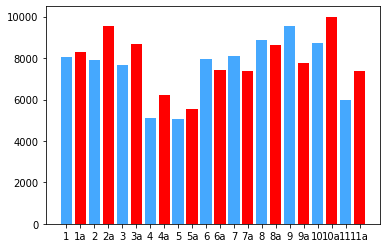

In [9]:
fol_dic={}
for i in range(1,12):
    fol_dic[i]=fol_count(i,0)
    fol_dic[str(i)+"a"]=fol_count(i,1)
    
plt.bar(range(len(fol_dic)), fol_dic.values(), color=['#45a8fe','red'])
plt.xticks(range(len(fol_dic)), list(fol_dic.keys()))
plt.show()

In [10]:
def interact(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(i)
    prefix="data/2020-04-"
    total=0
    rts=0
    rps=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            tweet_text=row[2]
            if "RT" in tweet_text:
                rts+=1
            if row[4]!="":
                rps+=1
            total+=1
    unr=total-rts-rps

    labels = "RTs","Reply","Unrelated"
    sizes = [rts,rps,unr]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=90)
    ax1.axis('equal')
    plt.title(prefix+day+["","appledata"][apple]+".csv")
    plt.show()
                       
def comp_compare(day):
    interact(day,0)
    interact(day,1)
    

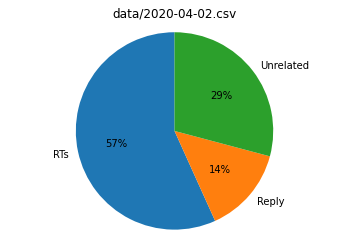

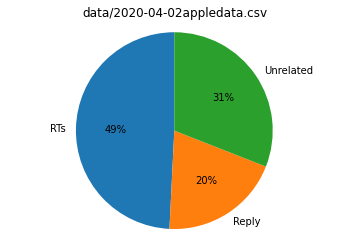

In [11]:
comp_compare(2)